# El método de Newton tradicional

### Lartaun Aramis de Icaza Astiz
### Pedro Porras Flores

Recordemos que el *método de Newton* es un método numérico *iterativo* para encontrar raíces de funciones (continuamente) diferenciables.

Sea $f$ la función cuyas raíces queremos encontrar.
La idea es que empecemos desde una adivinanza inicial $x_0$, y que la siguiente aproximación se calcula como sigue.

**[1]** (i) En general, $x_0$ *no* es una raíz. Suponiendo que $x_0$ esté cerca de una raíz, sea $x_0 + \delta x$ la raíz. Expande $f$ en una serie de Taylor a primer orden para encontrar una expresión aproximada para $\delta x$, y de ahí de la siguiente aproximación $x_1 := x_0 + \delta x$.


* Sea $x$ raíz de $f$ tal que $x = x_0 + \delta x$ y $f(x_0) \approx 0 $ 

$ f(x) = f(x_0 + \delta x) \approx f(x_0) +\delta x \ f'(x_0)$ 

$ x\approx x_1 = x_0  - \dfrac{f(x_0) }{ f'(x_0 )} $

(ii) Dé una interpretación geométrica de este resultado.

*  Se toma la pendiente de la tangente en $x_0$ y se calcula la insercción con $y = 0$, la cual una mejor aproximación a la raíz

(iii) Dibuja unas cuantas iteraciones en la computadora, con todo y la interpretación geométrica, para una función nolineal que escojas. 

* Considermos $f(x) = x^2 - 2$ y $x_0 = 1$ 

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

x0 = 1.3402027004047208
x0 = 1.2646341054289276
x0 = 1.2599385927540572



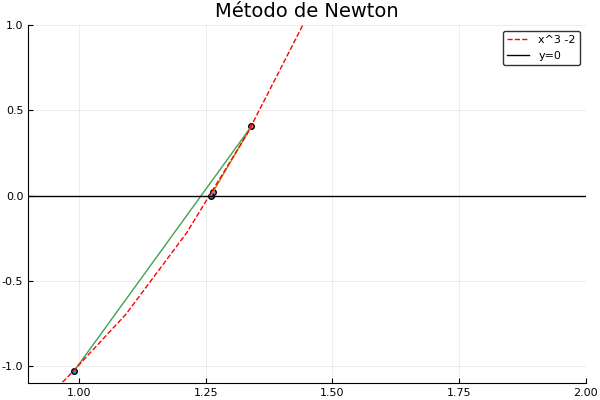

In [2]:
f(x) = x^3 - 2
fp(x) = 3*x^2
x0 = 0.99
xs = linspace(-0.7 , pi/2, 20)
plot(xlim = (0.9, 2.0), ylim = (-1.1, 1.0),lab="") 
scatter!((x0, f(x0)),lab="")

for i in 1:3
    xa = x0
    x0 = x0 - f(x0)/fp(x0)
    scatter!((x0,f(x0)),lab="")
    plot!([x0, xa], [f(x0), f(xa)],lab="")
    #plot!([x0, 0], [f(x0), 0] ) 
    @show x0
end
plot!(xs, f.(xs), line = :dash, c= "red", lab= "x^3 -2")
plot!([-2, 2], [0, 0], color = "black", title="Método de Newton",lab="y=0") 


**[2]** (i) Escribe una función `newton` que implementa la iteración para calcular una raíz de una función $f$, dada una adivinza inicial $x_0$. Utiliza diferenciación automática para calcular la derivada.

(ii) Utiliza tu código para calcular la raíz cuadrada y la raíz cúbica de $2$.  

(iii) ¿Cuál es una condición razonable de terminación del algoritmo? 

Implementaremos el método de Newton, usando diferenciación automática

In [3]:
using ForwardDiff

In [4]:
function newton(f,x0,n::Int64 = 10, tolerancia::Float64 = 1e-10 )
    for i in 1:n
        abs(f(x0)) <= tolerancia ? break : nothing
        x0 = x0 - f(x0)/ForwardDiff.derivative(f, x0)
    end
    f(x0)<1e-3 ? x0 : 0
end

newton (generic function with 3 methods)

* Calculemos la raíz cuadrada de 2, para ello consideremos la función `f(x) = x^2 - 2`

In [5]:
ff(x) = x^2 - 2 
xs = newton(ff, 10*rand())

1.4142135623730951

In [6]:
xs^2 

2.0000000000000004

* Ahora la raíz cubica de 3, con la función `g(x) = x^3 - 2`

In [7]:
#ff(x) = x^3 - 2
xz = newton(f, 10*rand())

1.2599210498948734

In [8]:
xz^3

2.000000000000001

**[3]** ¿Cómo es la convergencia del método hacia una raíz:

- cuando se empieza cerca de la raíz;

- cuando se empieza lejos.

[Pista: Utiliza `BigFloat` para obtener información más útil.]

In [9]:
x1 = newton(f, BigFloat(100), 20, 1e-30)
x2 = newton(f, BigFloat(5), 20, 1e-30)
x3 = newton(f, BigFloat(1.2), 20, 1e-30)
x4 = newton(f, BigFloat(0.4), 20, 1e-30)
    
println("Lejos de la raíz \n")
@show x1
println("\n")
println("Cerca de la raíz \n")
@show x2
@show x3
@show x4;

Lejos de la raíz 

x1 = 1.259921049894873164767210607278228350570251464701507980082950937210530726064065


Cerca de la raíz 

x2 = 1.25992104989487316476721060727822835060231115401748606998908129204512947330737
x3 = 1.259921049894873164767210607278228350570253101580470913944656618151383314909601
x4 = 1.259921049894873164767210607278228350570251464765410747444139537050047145406984


Vemos que si comenzamos cerca de la raíz el resultado converge a `1.259921049894873190666544360283296555280685424804687500000000000000000000000000`, pero lejos de la raíz **NO** converge a la raíz

## El método de Newton **puede fallar**

El método de Newton funciona muy bien a veces, pero también puede fallar:

**[4]** Utiliza el método de Newton para encontrar raíces *en el plano complejo*. Empezando desde distintos números complejos $a + bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Pista: distingue a los puntos iniciales según la componente imaginaria de la raíz a la cual convergen.]

Interpreta el resultado.

In [10]:
function newton(f,fp,x0,n::Int64 = 10, tolerancia::Float64 = 1e-10 )
    for i in 1:n
        abs(f(x0)) <= tolerancia ? break : nothing
        x0 = x0 - f(x0)/fp(x0)
    end
    abs(f(x0))<1e-3 ? x0 : 0 + 0im
end

newton (generic function with 6 methods)

In [11]:
g(x) = x^3 - 2
gp(x) = 3x^2

x0s = -2:0.001:2

z0s = zeros(length(x0s), length(x0s))
count = 1

for i in x0s
    for j in x0s
        
        x0 =  i + j*im 
        z0 = newton(g, gp, x0)

        z0s[count] = z0.re + z0.im
        count +=1
    end
end


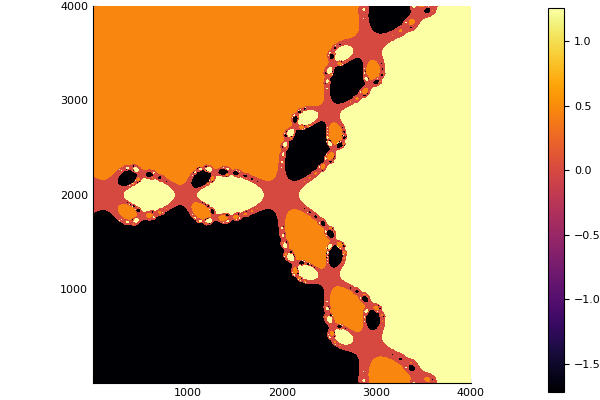

In [12]:
heatmap(z0s, aspect_ratio=1)

Interpretando la gráfica anterior vemos que la regiones correspondientes a los colores: negro, naranja y crema son regiones del plano complejo que convergen a las tres distintas raíces, el color rojo son los puntos del plano que divergen  

## Dimensión superior

El método de Newton se puede extender para encontrar raíces de funciones en dimensión superior, es decir de funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$.

**[5]** (i) Desarrolla el algoritmo del método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza inicial $\mathbf{x}_0$ y extiende el desarrollo de la pregunta (1) a este caso.

* El método de Newton multidimensional $$\mathbf{x}_{n+1} = \mathbf{x}_{n} - \left( D_{\mathbf{x}_{n}} \mathbf{f} \right)^{-1}  \left( \mathbf{f}(\mathbf{x}_{n}) \right) $$

(ii) ¿Qué tipo de cálculos necesitas poder hacer en Julia para implementar este algoritmo de forma numérica? ¿Cómo se lleva a cabo esto en Julia?

* Debemos calcular la matriz jacobiana de $\mathbf{f}$ en $\mathbf{x}_{0}$ invertir esta, después multiplicar por $\mathbf{f}$ en $\mathbf{x}_{0}$ y esto restarlo al mismo $\mathbf{x}_{n}$

(iii) Escribe una función que implementa el algoritmo. 

(iv) Encuentra raíces de funciones multidimensionales cuyas raíces conoces, para verificar que el algoritmo funcione.

In [13]:
### Implementamos Taylor multidimensinal

function newtonM(f,x0,n::Int64 = 10, tolerancia::Float64 = 1e-10 )
    for i in 1:n
        #abs(f(x0)) <= tolerancia ? break : nothing
        x0 = x0 - inv(ForwardDiff.jacobian(f, x0))*(f(x0))
    end
    
    x0
end

newtonM (generic function with 3 methods)

Definimos la función $$F(x,y) = \dfrac{1}{2}\left( 1 + \dfrac{\sin(x)}{4} + y,  1 + \sin(y) + x  \right) $$

In [14]:
F(x::Vector) = 0.5*[1 + sin(x[1])/4.0 + x[2] , 1 + sin(x[2]) + x[1] ]

F (generic function with 1 method)

Probamos nuestra función

In [15]:
F([0.0, pi/2])

2-element Array{Float64,1}:
 1.2854
 1.0   

Calculamos la raíz de `F` con `newtoM`

In [16]:
xsol= newtonM(F, [0.0, pi/2] )

2-element Array{Float64,1}:
 -0.184133
 -0.954226

Vericamos que si hemos encotrado una raíz de `F`

In [17]:
F(xsol)

2-element Array{Float64,1}:
 0.0
 0.0